In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# checking the Version

In [3]:
import pandas
print('pandas: {}'. format(pandas. __version__))

pandas: 1.1.3


# Convert Series Index to Column of dataframe

In [4]:
pop=pd.Series({'bahrain':134422 ,'ksa':3455666 ,'uae':3045522 ,'qatar':2345432})

In [5]:
pop

bahrain     134422
ksa        3455666
uae        3045522
qatar      2345432
dtype: int64

In [6]:
pop.index

Index(['bahrain', 'ksa', 'uae', 'qatar'], dtype='object')

In [7]:

 pop_df=pd.DataFrame(pop)

In [8]:
pop_df.reset_index(level=0, inplace=True)


In [9]:
pop_df

,index,0
0,bahrain,134422
1,ksa,3455666
2,uae,3045522
3,qatar,2345432


In [10]:
pop_df.columns

Index(['index', 0], dtype='object')

In [11]:
pop_df.columns=['city' ,'population']

In [12]:
pop_df

,city,population
0,bahrain,134422
1,ksa,3455666
2,uae,3045522
3,qatar,2345432


# Combining Many series to form Dataframe


In [13]:
s1 = pd.Series([1, 2], index=['A', 'B'], name='s1')

In [14]:
s2 = pd.Series([3, 4], index=['A', 'B'], name='s2')

In [15]:
s1

A    1
B    2
Name: s1, dtype: int64

In [16]:
s2

A    3
B    4
Name: s2, dtype: int64

In [17]:
sd =pd.concat([s1, s2], axis=1)

In [18]:
sd

,s1,s2
A,1,3
B,2,4


In [19]:
x = pd.Series({'a':1,'b':2,})
y = pd.Series({'d':4,'e':5})
pd.concat([x,y],axis=1)

,0,1
a,1.0,NaN
b,2.0,NaN
d,NaN,4.0
e,NaN,5.0


In [20]:
pd.concat([x.reset_index(drop=True),y.reset_index(drop=True)],axis=1)


,0,1
0,1,4
1,2,5


# name the series index

In [21]:
data = {'Column 1'     : [1., 2., 3., 4.],
        'Index Title'  : ["Apples", "Oranges", "Puppies", "Ducks"]}


In [22]:
df = pd.DataFrame(data)


In [23]:
df.index = df["Index Title"]


In [24]:
del df["Index Title"]

In [25]:
df

,Column 1
Index Title,
Apples,1.0
Oranges,2.0
Puppies,3.0
Ducks,4.0


# minimum, 25th percentile, median, 75th, and max of a numeric series?


In [26]:
 s= pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

# qcut()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

In [28]:
planets = sns.load_dataset('planets', 
        usecols=['method', 'orbital_period', 
                'mass', 'distance']).dropna()
planets.head()


,method,orbital_period,mass,distance
0,Radial Velocity,269.300,7.10,77.40
1,Radial Velocity,874.774,2.21,56.95
2,Radial Velocity,763.000,2.60,19.84
3,Radial Velocity,326.030,19.40,110.62
4,Radial Velocity,516.220,10.50,119.47


In [29]:
planets.describe()

,orbital_period,mass,distance
count,498.000000,498.000000,498.000000
mean,835.778671,2.509320,52.068213
std,1469.128259,3.636274,46.596041
min,1.328300,0.003600,1.350000
25%,38.272250,0.212500,24.497500
50%,357.000000,1.245000,39.940000
75%,999.600000,2.867500,59.332500
max,17337.500000,25.000000,354.000000


In [30]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 784
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          498 non-null    object 
 1   orbital_period  498 non-null    float64
 2   mass            498 non-null    float64
 3   distance        498 non-null    float64
dtypes: float64(3), object(1)
memory usage: 19.5+ KB


In [31]:
planets['method'].unique()


array(['Radial Velocity', 'Transit'], dtype=object)

<AxesSubplot:xlabel='mass', ylabel='Count'>

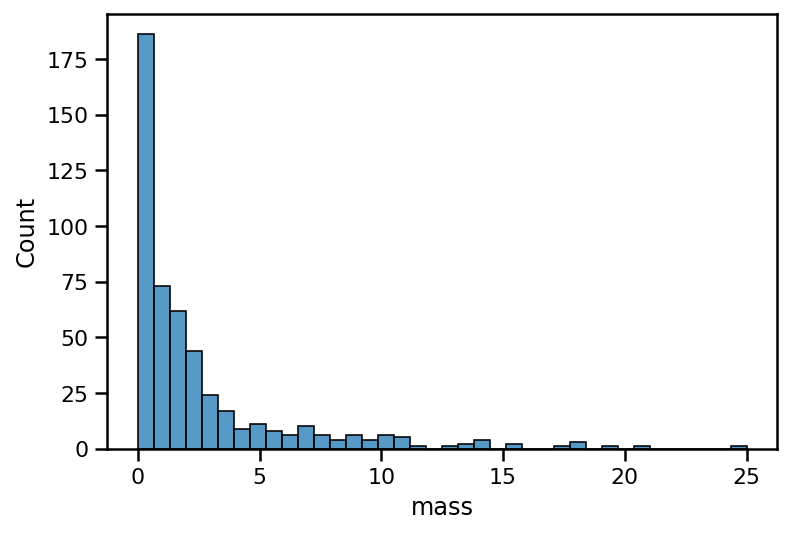

In [32]:
sns.histplot(planets['mass'])


In [33]:
planets['orbital_period'].describe(
    percentiles=[0, 1/5, 2/5, 3/5, 4/5, 1]).reset_index()


,index,orbital_period
0,count,498.000000
1,mean,835.778671
2,std,1469.128259
3,min,1.328300
4,0%,1.328300
5,20%,19.802000
6,40%,191.372000
7,50%,357.000000
8,60%,507.819600
9,80%,1253.600000


In [34]:
pd.qcut(x=planets['distance'], q=4)

0                   (59.332, 354.0]
1                   (39.94, 59.332]
2      (1.3490000000000002, 24.498]
3                   (59.332, 354.0]
4                   (59.332, 354.0]
                   ...             
640    (1.3490000000000002, 24.498]
641                 (39.94, 59.332]
642    (1.3490000000000002, 24.498]
649                 (59.332, 354.0]
784                 (59.332, 354.0]
Name: distance, Length: 498, dtype: category
Categories (4, interval[float64]): [(1.3490000000000002, 24.498] < (24.498, 39.94] < (39.94, 59.332] < (59.332, 354.0]]

#qcut() divides the data into percentile bins rather than constructing each bin with numeric edges.


In [35]:
planets['distance'].describe()


count    498.000000
mean      52.068213
std       46.596041
min        1.350000
25%       24.497500
50%       39.940000
75%       59.332500
max      354.000000
Name: distance, dtype: float64

In [36]:
planets['quantiles_4'] = pd.qcut(x=planets['distance'],
                                q=4, 
                                precision=0)
planets.sample(5)

,method,orbital_period,mass,distance,quantiles_4
412,Radial Velocity,520.0,2.60,164.20,"(59.0, 354.0]"
237,Radial Velocity,1075.2,6.21,32.56,"(24.0, 40.0]"
394,Radial Velocity,361.1,0.90,132.80,"(59.0, 354.0]"
2,Radial Velocity,763.0,2.60,19.84,"(0.0, 24.0]"
531,Radial Velocity,1145.0,0.67,64.98,"(59.0, 354.0]"


In [37]:
labels = ['near', 'medium', 'far', 'very_far']
planets['quantiles_4_labelled'] = pd.qcut(planets['distance'],
                                          q=4,
                                          labels=labels,
                                          precision=0)
planets.sample(5)

,method,orbital_period,mass,distance,quantiles_4,quantiles_4_labelled
198,Radial Velocity,349.700,1.250,25.64,"(24.0, 40.0]",medium
483,Radial Velocity,176.300,2.900,126.10,"(59.0, 354.0]",very_far
629,Radial Velocity,147.730,1.280,52.88,"(40.0, 59.0]",far
607,Radial Velocity,5501.000,10.390,29.20,"(24.0, 40.0]",medium
319,Radial Velocity,25.648,0.027,52.03,"(40.0, 59.0]",far


In [38]:
planets['quantiles_4_labelled'].value_counts()

very_far    125
near        125
far         124
medium      124
Name: quantiles_4_labelled, dtype: int64

In [39]:
planets.drop(['quantiles_4', 'quantiles_4_labelled'],
             inplace=True,
             axis='columns')

# Finding multiple of 3 in a series

In [40]:
import pandas as pd
import numpy as np
num_series = pd.Series(np.random.randint(1, 10, 9))
print("Original Series:")
print(num_series)
result = np.argwhere(np.array(num_series) % 3==0)
print("Positions of numbers that are multiples of 3:")
print(result)

Original Series:
0    2
1    1
2    4
3    6
4    7
5    3
6    6
7    7
8    8
dtype: int32
Positions of numbers that are multiples of 3:
[[3]
 [5]
 [6]]


# Stack Series Horizontally /verctically

In [41]:
 
  
# creating the series 
series1 = pd.Series(['g', 'e', 'e', 'k', 's']) 
print("Series 1:") 
print(series1) 
series2 = pd.Series([9, 8, 7, 6, 5]) 
print("Series 2:") 
print(series2) 
   
# stacking the series horizontally 
df = pd.concat([series1, series2], axis = 1) 
print("\nStack two series horizontally:") 
display(df) 

Series 1:
0    g
1    e
2    e
3    k
4    s
dtype: object
Series 2:
0    9
1    8
2    7
3    6
4    5
dtype: int64

Stack two series horizontally:


,0,1
0,g,9
1,e,8
2,e,7
3,k,6
4,s,5


In [42]:
# creating the series 
series1 = pd.Series(['g', 'e', 'e', 'k', 's']) 
print("Series 1:") 
print(series1) 
series2 = pd.Series([9, 8, 7, 6, 5]) 
print("Series 2:") 
print(series2) 
   
# stacking the series vertically 
df = pd.concat([series1, series2], axis = 0) 
print("\nStack two series vertically:") 
display(df) 

Series 1:
0    g
1    e
2    e
3    k
4    s
dtype: object
Series 2:
0    9
1    8
2    7
3    6
4    5
dtype: int64

Stack two series vertically:


0    g
1    e
2    e
3    k
4    s
0    9
1    8
2    7
3    6
4    5
dtype: object

# get the day of month, week number, day of year and day of week from a series of date strings?

In [43]:
from dateutil.parser import parse
date_series = pd.Series(['01 Jan 2015', '10-02-2016', '20180307', '2014/05/06', '2016-04-12', '2019-04-06T11:20'])
print("Original Series:")
print(date_series)
date_series = date_series.map(lambda x: parse(x))
print("Day of month:")
print(date_series.dt.day.tolist())
print("Day of year:")
print(date_series.dt.dayofyear.tolist())
print("Week number:")
print(date_series.dt.weekofyear.tolist())
print("Day of week:")
print(date_series.dt.isocalendar().week.tolist())

Original Series:
0         01 Jan 2015
1          10-02-2016
2            20180307
3          2014/05/06
4          2016-04-12
5    2019-04-06T11:20
dtype: object
Day of month:
[1, 2, 7, 6, 12, 6]
Day of year:
[1, 276, 66, 126, 103, 96]
Week number:
[1, 39, 10, 19, 15, 14]
Day of week:
[1, 39, 10, 19, 15, 14]


<ipython-input-43-fd5880142a93>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  print(date_series.dt.weekofyear.tolist())


# How to find euclidean distance between 2 series

In [44]:
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = pd.Series([11, 8, 7, 5, 6, 5, 3, 4, 7, 1])
print("Original series:")
print(x)
print(y)
print("\nEuclidean distance between two said series:")
print(np.linalg.norm(x-y))

Original series:
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64
0    11
1     8
2     7
3     5
4     6
5     5
6     3
7     4
8     7
9     1
dtype: int64

Euclidean distance between two said series:
16.492422502470642


# apply function on existing columns?

In [45]:
df = pd.DataFrame({"A": [10,20,30], "B": [20, 30, 10]})

def fx(x):
    return x * x

print(df)
df['Multplication_NewColumn'] = df.A.apply(fx)
print(df)

    A   B
0  10  20
1  20  30
2  30  10
    A   B  Multplication_NewColumn
0  10  20                      100
1  20  30                      400
2  30  10                      900


# Pandas Assignment

# Pandas' read_csv function directly on this url to open i t as a DataFrame

In [46]:
earth_quake=pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")

In [47]:
earth_quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


#  Re-read the data i n such a way that all date columns are i dentified as dates and the earthquake i d i s used as the index

In [48]:
earth_quake.set_index('id' ,inplace=True)

In [49]:
earth_quake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  updated    120108 non-null  object 
 12  place      120108 non-null  object 
 13  type       120108 non-null  object 
dtypes: float64(8), object(6)
memory usage: 13.7+ MB


In [50]:
earth_quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [51]:
from datetime import date


In [52]:
earth_quake['time'] = pd.to_datetime(earth_quake['time'])


In [53]:
earth_quake['updated'] = earth_quake['updated'] .astype('datetime64[ns]')


In [54]:
earth_quake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  datetime64[ns]
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](2), float64(8), object(4)
memory usage: 13.7+ MB


# Use describe to get the basic statistics of all the columns.

In [55]:
earth_quake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


# Use sort_values to get the top 20 earthquakes by magnitude.

In [56]:
earth_quake.sort_values(by='mag' ,inplace=True ,ascending=False)

In [57]:
earth_quake.head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56.000,"56km WSW of Panguna, Papua New Guinea",earthquake


# Find the 10 states / countries with the highest number of earthquakes

In [58]:
earth_cnt=earth_quake.groupby('place').count()

In [59]:
 earth_cntry=earth_quake['place'].str.split("," ,expand=True)

In [60]:
earth_cntry[1].value_counts().head(10)

 California     44451
 Alaska         33589
 Oregon          3195
 Nevada          2858
 Washington      2784
 Hawaii          2564
 Puerto Rico     2284
 Indonesia       2120
 Oklahoma        1992
 Montana         1991
Name: 1, dtype: int64

# the top 10 states / countries where the strongest and weakest earthquakes occured.

In [61]:
earth_quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633,"70km SW of Panguna, Papua New Guinea",earthquake


In [62]:
earth_quake['country']=earth_quake['place'].str.split("," ,expand=True)[1]

In [63]:
 earth_quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223,"94km NW of Iquique, Chile",earthquake,Chile
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699,"19km SE of Little Sitkin Island, Alaska",earthquake,Alaska
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755,"53km SW of Iquique, Chile",earthquake,Chile
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398,"93km SSE of Kirakira, Solomon Islands",earthquake,Solomon Islands
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633,"70km SW of Panguna, Papua New Guinea",earthquake,Papua New Guinea


In [64]:

country_top=earth_quake.dropna(how='all').nlargest(40,['mag'])['country'].unique()

In [65]:
earth_quake['country'].dropna(how='all')


id
usc000nzvd                Chile
usc000rki5               Alaska
usc000p27i                Chile
usc000phx5      Solomon Islands
usb000pr89     Papua New Guinea
                    ...        
usc000rd9g               Oregon
usc000rbx5             Oklahoma
us2014_001           California
usb000rryt             Colorado
ak11398603               Alaska
Name: country, Length: 116607, dtype: object

In [66]:
earth_quake['country']

id
usc000nzvd                Chile
usc000rki5               Alaska
usc000p27i                Chile
usc000phx5      Solomon Islands
usb000pr89     Papua New Guinea
                    ...        
usc000rc7u                 None
usc000rbx5             Oklahoma
us2014_001           California
usb000rryt             Colorado
ak11398603               Alaska
Name: country, Length: 120108, dtype: object

In [67]:
for x in range(len(country_top)): 
    print(country_top[x])
      

 Chile
 Alaska
 Solomon Islands
 Papua New Guinea
 El Salvador
 Mexico
 Indonesia
 Fiji
None
 
 New Zealand
 China
 Greece
 California
 Peru
 Guam
 Wallis and Futuna
 Panama
 New Caledonia
 Philippines
 Nicaragua
 Vanuatu


# Matplotlib

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [69]:
iris = sns.load_dataset('iris')


In [70]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


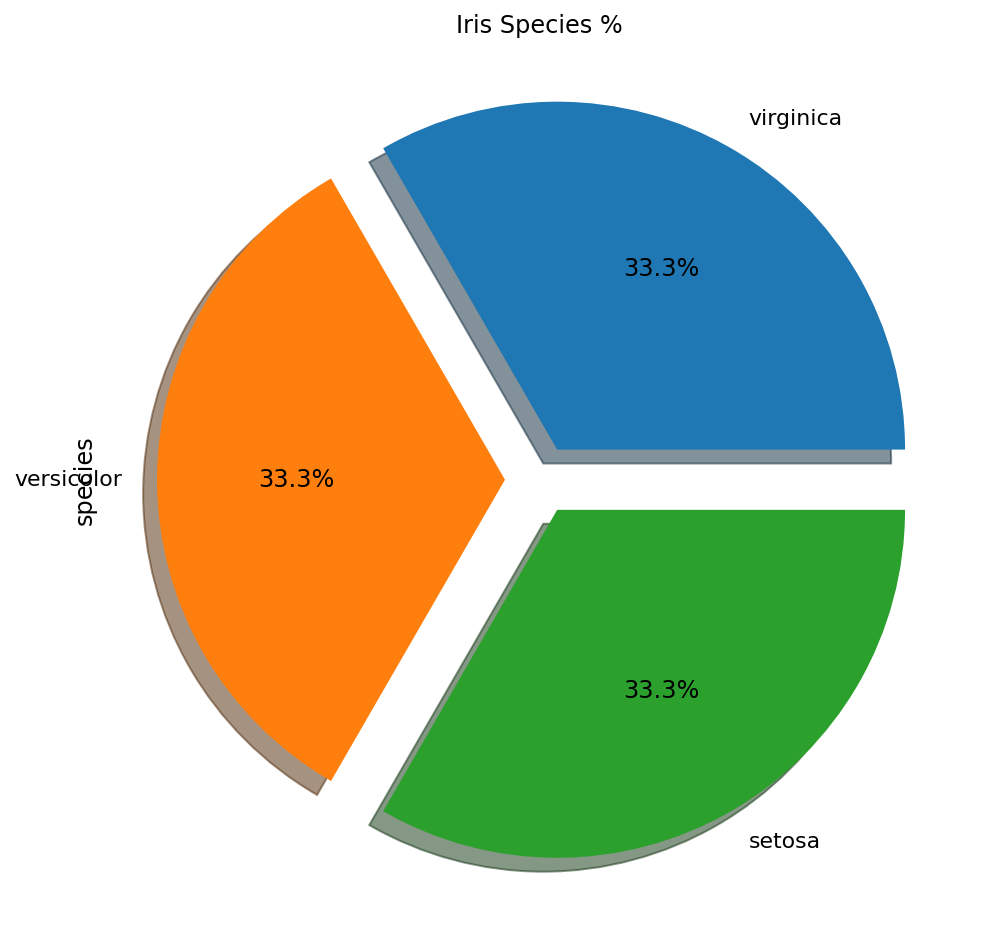

In [71]:

ax=plt.subplots(1,1,figsize=(10,8))
iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show();


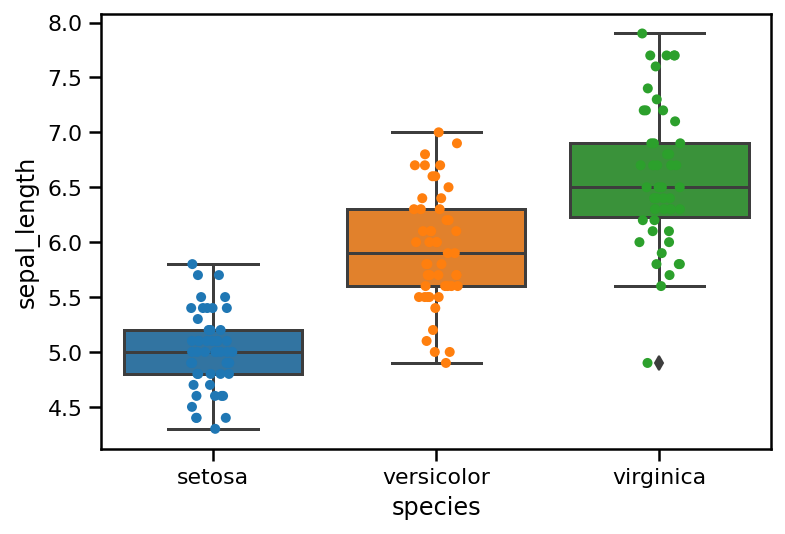

In [72]:
ax =  sns.stripplot(y="sepal_length", x="species", data=iris)
ax1= sns.boxplot(x="species", y="sepal_length" ,data =iris)

In [73]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# pandas +matplotlib 

In [74]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Indicators", cnx)


In [80]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [83]:
Countries = df['CountryName'].unique().tolist()
codes = df['CountryCode'].unique().tolist()
indicators = df['IndicatorName'].unique().tolist()
print("Countries: %d" % (len(Countries))) #Old method of printing
print("Country Codes: {}".format(len(codes)))
print("Indicators: {}".format(len(indicators)))

Countries: 247
Country Codes: 247
Indicators: 1344


In [161]:
years = df['Year'].unique().tolist()


In [162]:
years = df['Year'].unique().tolist()
print(len(years))
print("Data is available from {} to {}".format(min(years), max(years)))


56
Data is available from 1960 to 2015


In [187]:
df_Co2_emission=df[df['IndicatorName'].str.contains('CO2 emissions \(metric')]

In [188]:
df_Co2_emission

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
86,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
166,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
362,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729
...,...,...,...,...,...,...
5198435,Vietnam,VNM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,1.971889
5199322,West Bank and Gaza,WBG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.572407
5199936,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.919968
5200687,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.212450


In [185]:
df_gdp=df[df['IndicatorName'].str.contains('GDP per capita \(constant 2005')] 

In [186]:
df_gdp.shape

(9951, 6)

In [189]:
 
# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage_India = df_gdp[df_gdp['CountryName']=='India']
print(len(gdp_stage_India)) 

55


In [192]:
stage_India=df_Co2_emission[df_Co2_emission['CountryName']=='India']
stage_India
print(len(stage_India))

52


In [193]:
print("GDP Min Year = ", gdp_stage_India['Year'].min(), "max: ", gdp_stage_India['Year'].max())
print("CO2 Min Year = ", stage_India['Year'].min(), "max: ", stage_India['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [194]:
gdp_stage_trunc_India = gdp_stage_India[gdp_stage_India['Year'] < 2012]
print(len(gdp_stage_trunc_India))
print(len(stage_India))


52
52


In [195]:
X = gdp_stage_trunc_India['Value']                   # Obtaining GDP values 
Y = stage_India['Value']                             # Obtaining CO2 values


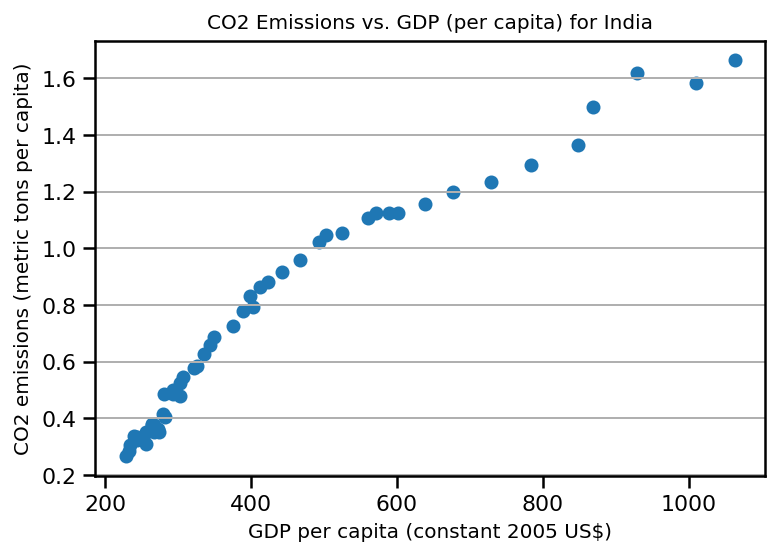

In [196]:
%matplotlib inline

#Plotting a subplot 
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP (per capita) for India',fontsize=10)
axis.set_xlabel(gdp_stage_trunc_India['IndicatorName'].iloc[0],fontsize=10)   
axis.set_ylabel(stage_India['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc_India['Value']                   # Obtaining GDP values 
Y = stage_India['Value']                             # Obtaining CO2 values

axis.scatter(X, Y)
plt.show();

# End of Assignment